# __COMPUTATION II: ALGORITHMS & DATA STRUCTURES__

# PROJECT

Group Name:Group 21

Group Members: Gonçalo Faustino, Miguel Pires, Bernardo Coelho

Student Numbers: 20231721,

--------------------------
**Don't change or modify the order and titles of this notebook.** However, feel free to add as many cells as you want between sections. 

Good luck!

# Section 1: Dataset

Read and store the dataset file provided to you (`sales_dataset_group_<X>.pkl`).

Store the dataset under the variable name `dataset`.

In [1]:
import pickle
from datetime import datetime
import matplotlib.pyplot as plt

with open("sales_dataset_group_21.pkl", "rb") as data:
    dataset = pickle.load(data)


# Section 2: Fixing problems in the dataset

Fix here any problems you may find in the dataset while you're developing the project. 

**Do not modify the dataset anywhere else except in this section!**

In [21]:
#creating a name list for the purpose of seeing errors in name spelling
def get_names(data_list):
    unique_names = []
    for data in data_list:
        name = data["Name"]
        if name not in unique_names:
            unique_names.append(name)
    return sorted(unique_names)
# nomes mal escrito é erro?

# creating a price list for purposes of fixing errors
def price_list(dataset):
    price_list = {}
    for data in dataset:
        item = data["Item"]
        unit_price = data["Unit Price"]
        if isinstance(unit_price, (int, float)):
            if not isinstance(item, (int, float)):
                if item not in price_list:
                    price_list[item] = unit_price
    return price_list
        
price_list(dataset)


{'donation_voucher': 7,
 'beer': 1.2,
 'pen': 2.5,
 'flash_drive': 5,
 'notebook': 3,
 'tshirt': 15,
 'hoodie': 27,
 'party_ticket': 9,
 'chocolate': 1.5,
 'game_ticket': 6.5,
 'coffee': 0.6,
 'water': 0.3,
 'snack_pack': 1.3,
 'water_bottle': 0.8,
 'printing': 0.2,
 'lecture_notes': 2.3,
 'photocopy': 0.3,
 'concert_ticket': 10}

# Section 3: Extraction of Information

### Extraction of recency, frequency and monetary values

In [23]:

def costumer_data_function(name):
    costumer_data = []
    for i in dataset:
        if i["Name"].lower() == name.lower():
            costumer_data.append(i)
    return costumer_data

def lastpurchasedate(name):
    costumer_data = costumer_data_function(name)
    last_purchase_date = costumer_data[0]["Date"]
    for data in costumer_data:
        if data["Date"] > last_purchase_date:
            last_purchase_date = data["Date"]
    
    last_purchase_datetime = datetime.strptime(last_purchase_date, '%Y-%m-%d')
    reference_datetime = datetime.strptime('2024-03-01', '%Y-%m-%d')
    days_passed = (reference_datetime - last_purchase_datetime).days
    
    return last_purchase_date, days_passed

# dictionary with costumer name as key and days since last purchase as value
recency = {}
for data in dataset:
    name = data["Name"]
    last_purchase_date, days_passed = lastpurchasedate(name)
    recency[name] = days_passed


def numberofpurchases(name):
    costumer_data = costumer_data_function(name)
    return len(costumer_data)

#dictionary to store the number of purchases for each student
frequency = {}
for data in dataset:
    name = data["Name"]
    if name in frequency:
        frequency[name] += 1
    else:
        frequency[name] = 1
 
def totalamountspent(name):
    costumer_data = costumer_data_function(name)
    total = 0
    error = 0
    for i in costumer_data:
        unit_price = i["Item"]
        if isinstance(unit_price, (int, float)):
            total += unit_price * i["Quantity"]
        elif isinstance(unit_price, str) and unit_price in price_list(dataset):
            total += price_list(dataset)[unit_price] * i["Quantity"]
        else:
            error += 1
            print(f"Error: Invalid unit price '{unit_price}' for item '{i['Item']}'")

    print(f"There were {error} errors in the data.")
    return total

#dictionary to store the total amount spent by each student
monetary_value = {}

for data in dataset:
    name = data["Name"]
    unit_price = data["Unit Price"]
    quantity = data["Quantity"]
    
    if isinstance(unit_price, (int, float)):
        total = unit_price * quantity
    elif isinstance(unit_price, str) and unit_price in correct_price_list:
        total = correct_price_list[unit_price] * quantity
    else:
        total = 0
    if name in monetary_value:
        monetary_value[name] += total
    else:
        monetary_value[name] = total





In [24]:
#test cell
print(totalamountspent("Leonor"))

Error: Invalid unit price 'RAND' for item 'RAND'
Error: Invalid unit price 'RAND' for item 'RAND'
There were 2 errors in the data.
595.3999999999999


### Histograms

Text(0.5, 1.0, 'Monetary Value')

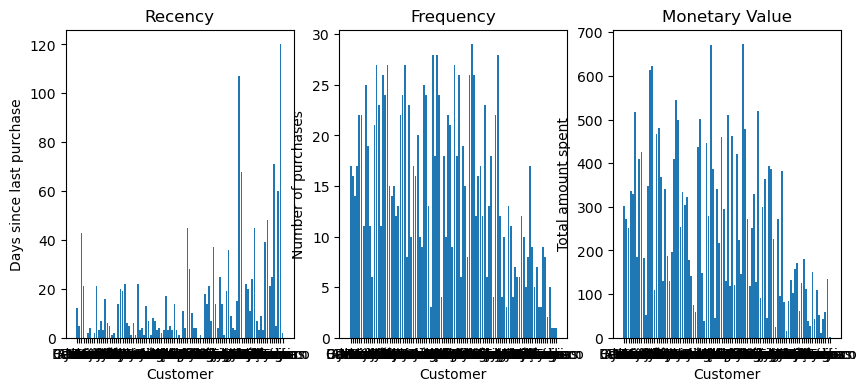

In [6]:
# Plotting recency
plt.figure(figsize=(10, 4))
plt.subplot(1, 3, 1)
plt.bar(recency.keys(), recency.values())
plt.xlabel('Customer')
plt.ylabel('Days since last purchase')
plt.title('Recency')

# Plotting frequency
plt.subplot(1, 3, 2)
plt.bar(frequency.keys(), frequency.values())
plt.xlabel('Customer')
plt.ylabel('Number of purchases')
plt.title('Frequency')

# Plotting monetary_value
plt.subplot(1, 3, 3)
plt.bar(monetary_value.keys(), monetary_value.values())
plt.xlabel('Customer')
plt.ylabel('Total amount spent')
plt.title('Monetary Value')



# Section 4: Sorting

### First RFM scores (RFM)

- Can you determine which students are most valuable to our SU, considering that our
organization is evil and values students solely based on their purchase history?

Answer: 

### Second RFM Scores (RFM')

### Correlation

# Section 5: Searching

### Linear Search

- Who do you think is the best student/customer among your group?

Answer:

### Alphabetical Sorting

### Binary Search

- How much time, in terms of seconds, did it take to find a name using linear search and
binary search? Compare the results. (You can use the timeit module.)

Answer:

---------------------

Great job, congrats!